In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, max_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
df_option = pd.read_pickle("df_final_jointed_all_train.pkl")

In [ ]:
#def is_third_friday(date_ts):
#    return date_ts.weekday() == 4 and 15 <= date_ts.day <= 21

In [5]:
df_option.columns

Index(['Target_std', 'prior_std', 'prior_Vol', 'cut_open', 'cut_1hr',
       'cut_2hr', 'cut_3hr', 'vix_prior_std', 'vix_cut_open', 'vix_cut_1hr',
       'vix_cut_2hr', 'vix_cut_3hr', 'tqqq_prior_std', 'tqqq_Vol',
       'tqqq_cut_open', 'tqqq_cut_1hr', 'tqqq_cut_2hr', 'tqqq_cut_3hr'],
      dtype='object')

In [6]:
#df_option['OP_EXP'] = [is_third_friday(df_option.index[i]) for i in range(len(df_option.index))]

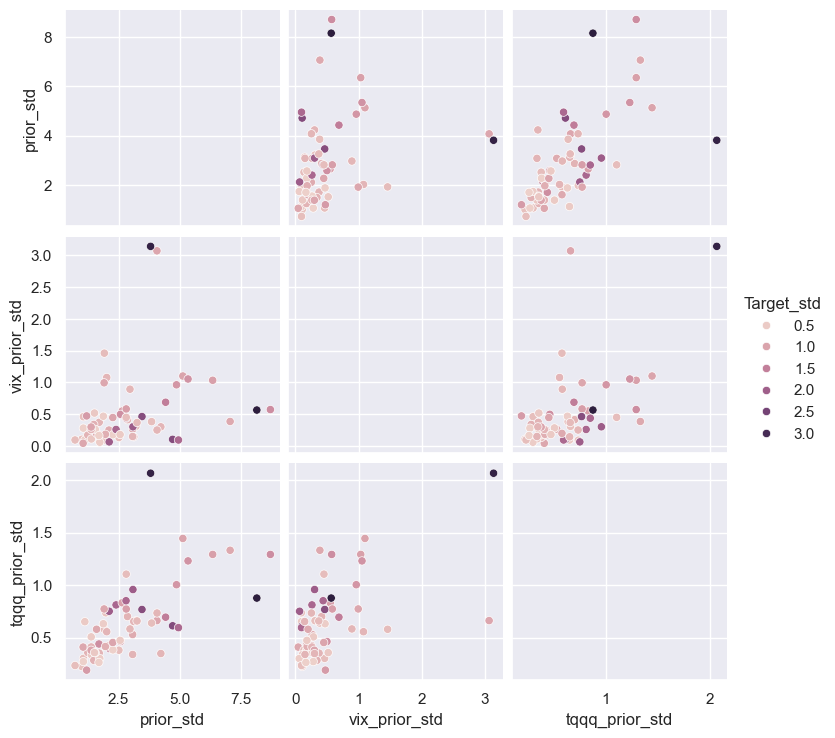

In [4]:
sns.pairplot(df_option[['Target_std','prior_std','vix_prior_std','tqqq_prior_std']], hue='Target_std')

---
---

<Axes: >

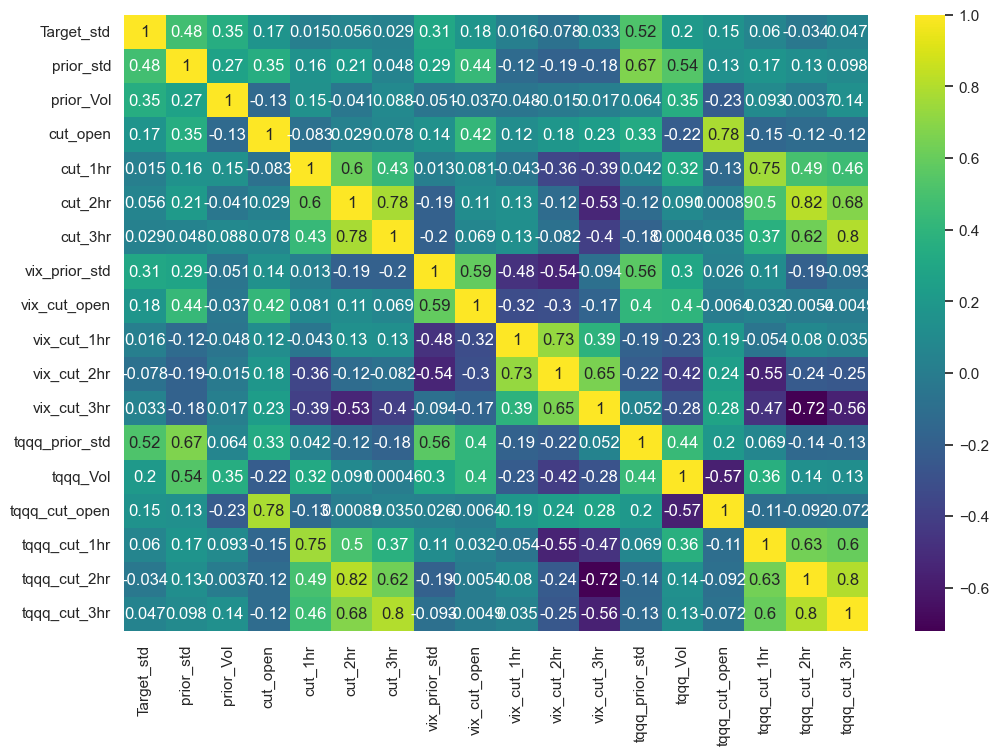

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df_option.corr(numeric_only=True),cmap='viridis',annot=True)

<Axes: ylabel='Frequency'>

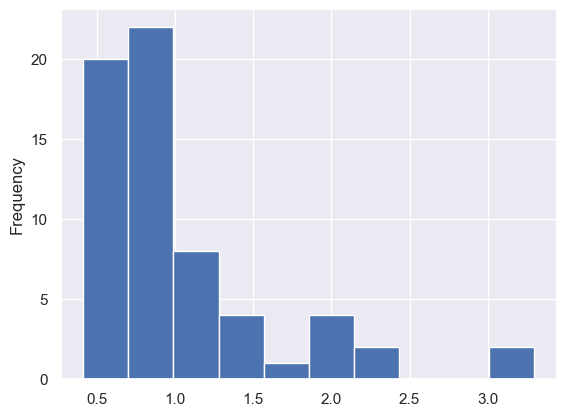

In [8]:
df_option.Target_std.plot.hist()

In [9]:
#sns.catplot(x='OP_EXP',y='Target_std',data=df_option, kind='box')

In [10]:
df_option.reset_index(inplace=True)

In [11]:
df_option

,Date_Only,Target_std,prior_std,prior_Vol,cut_open,cut_1hr,cut_2hr,cut_3hr,vix_prior_std,vix_cut_open,vix_cut_1hr,vix_cut_2hr,vix_cut_3hr,tqqq_prior_std,tqqq_Vol,tqqq_cut_open,tqqq_cut_1hr,tqqq_cut_2hr,tqqq_cut_3hr
0,2024-01-05,0.650053,1.058044,18218.376667,351.89,0.70,0.97,-0.11,0.463383,13.53,0.10,0.03,-0.17,0.301283,199340.133333,46.10,0.05,0.18,-0.34
1,2024-01-12,0.629948,0.993937,29812.156667,375.53,0.89,1.75,-0.75,0.109005,12.55,-0.02,-0.03,-0.15,0.223571,156363.693333,50.40,0.06,0.29,-0.05
2,2024-01-19,0.509282,1.115984,28760.476667,383.97,0.83,2.83,2.65,0.097359,13.41,-0.28,-0.22,-0.08,0.651070,206204.083333,54.46,0.71,1.27,1.55
3,2024-01-26,0.813494,1.238336,18011.023333,395.97,0.11,-0.05,-0.30,0.176661,13.30,0.02,0.01,-0.04,0.356931,146601.786667,55.44,-0.11,-0.63,-0.75
4,2024-02-02,2.322338,4.712763,156749.593333,478.94,2.13,-2.85,1.92,0.108060,13.81,-0.24,-0.22,-0.11,0.611902,229504.093333,57.40,0.33,-0.04,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2025-02-28,2.284799,3.457627,19624.563333,657.29,-1.04,-3.43,-1.62,0.465128,20.65,-0.91,-1.07,-0.07,0.767429,200316.643333,71.61,0.12,-0.97,-0.34
59,2025-03-07,1.311185,8.718339,35741.483333,626.00,10.33,19.82,18.71,0.575226,23.47,-0.26,-1.38,-2.53,1.292159,314475.686667,67.48,1.73,3.52,3.54
60,2025-03-14,0.758964,2.965842,18741.093333,605.71,0.88,0.58,2.23,0.894907,21.74,-0.48,-0.61,-0.98,0.581809,234059.553333,61.26,-0.16,0.19,-0.10
61,2025-03-21,0.708330,3.255008,28634.216667,593.88,1.38,1.20,3.91,0.371233,19.82,0.14,0.00,0.10,0.657912,184808.116667,61.25,0.22,0.01,1.19


## Splitting the Data


In [12]:
X = df_option.drop(['Date_Only','Target_std'], axis=1)  
y = df_option['Target_std']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [14]:
X_train.shape

(50, 17)

In [15]:
y_train.shape

(50,)

## Evaluation Run Model with the Data


In [16]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test,preds)
    print(f'mae : {mae}')
   
    
    plt.figure(figsize=(12,8),dpi=200)
    plt.scatter(y_test, preds)
    plt.xlabel('real_std')

    return model

In [17]:
# Define the parameter grid for GridSearchCV
dt_regressor = DecisionTreeRegressor()

# param_grid = {
#     'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  # Or other relevant criteria
#     'max_depth': [1, 2, 3, 4, 5],  # Or other relevant depths
#     #'max_features': ['auto', 'sqrt', 'log2'],  # Or other relevant features
#     'splitter': ['best', 'random'],  # Or other relevant splitters
#     # Add other parameters as needed
# }

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

In [18]:
grid_search = GridSearchCV(
    estimator=dt_regressor,  # The model to tune
    param_grid=param_grid,  # The parameter grid
    scoring='neg_root_mean_squared_error',  # Or other relevant scoring metric
    cv=10,  # Number of cross-validation folds
    verbose=2,  # Show progress
    n_jobs=-1  # Use all available cores
)

In [19]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [20]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

Best parameters: {'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}


mae : 0.3350527633945359


DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_leaf=3)

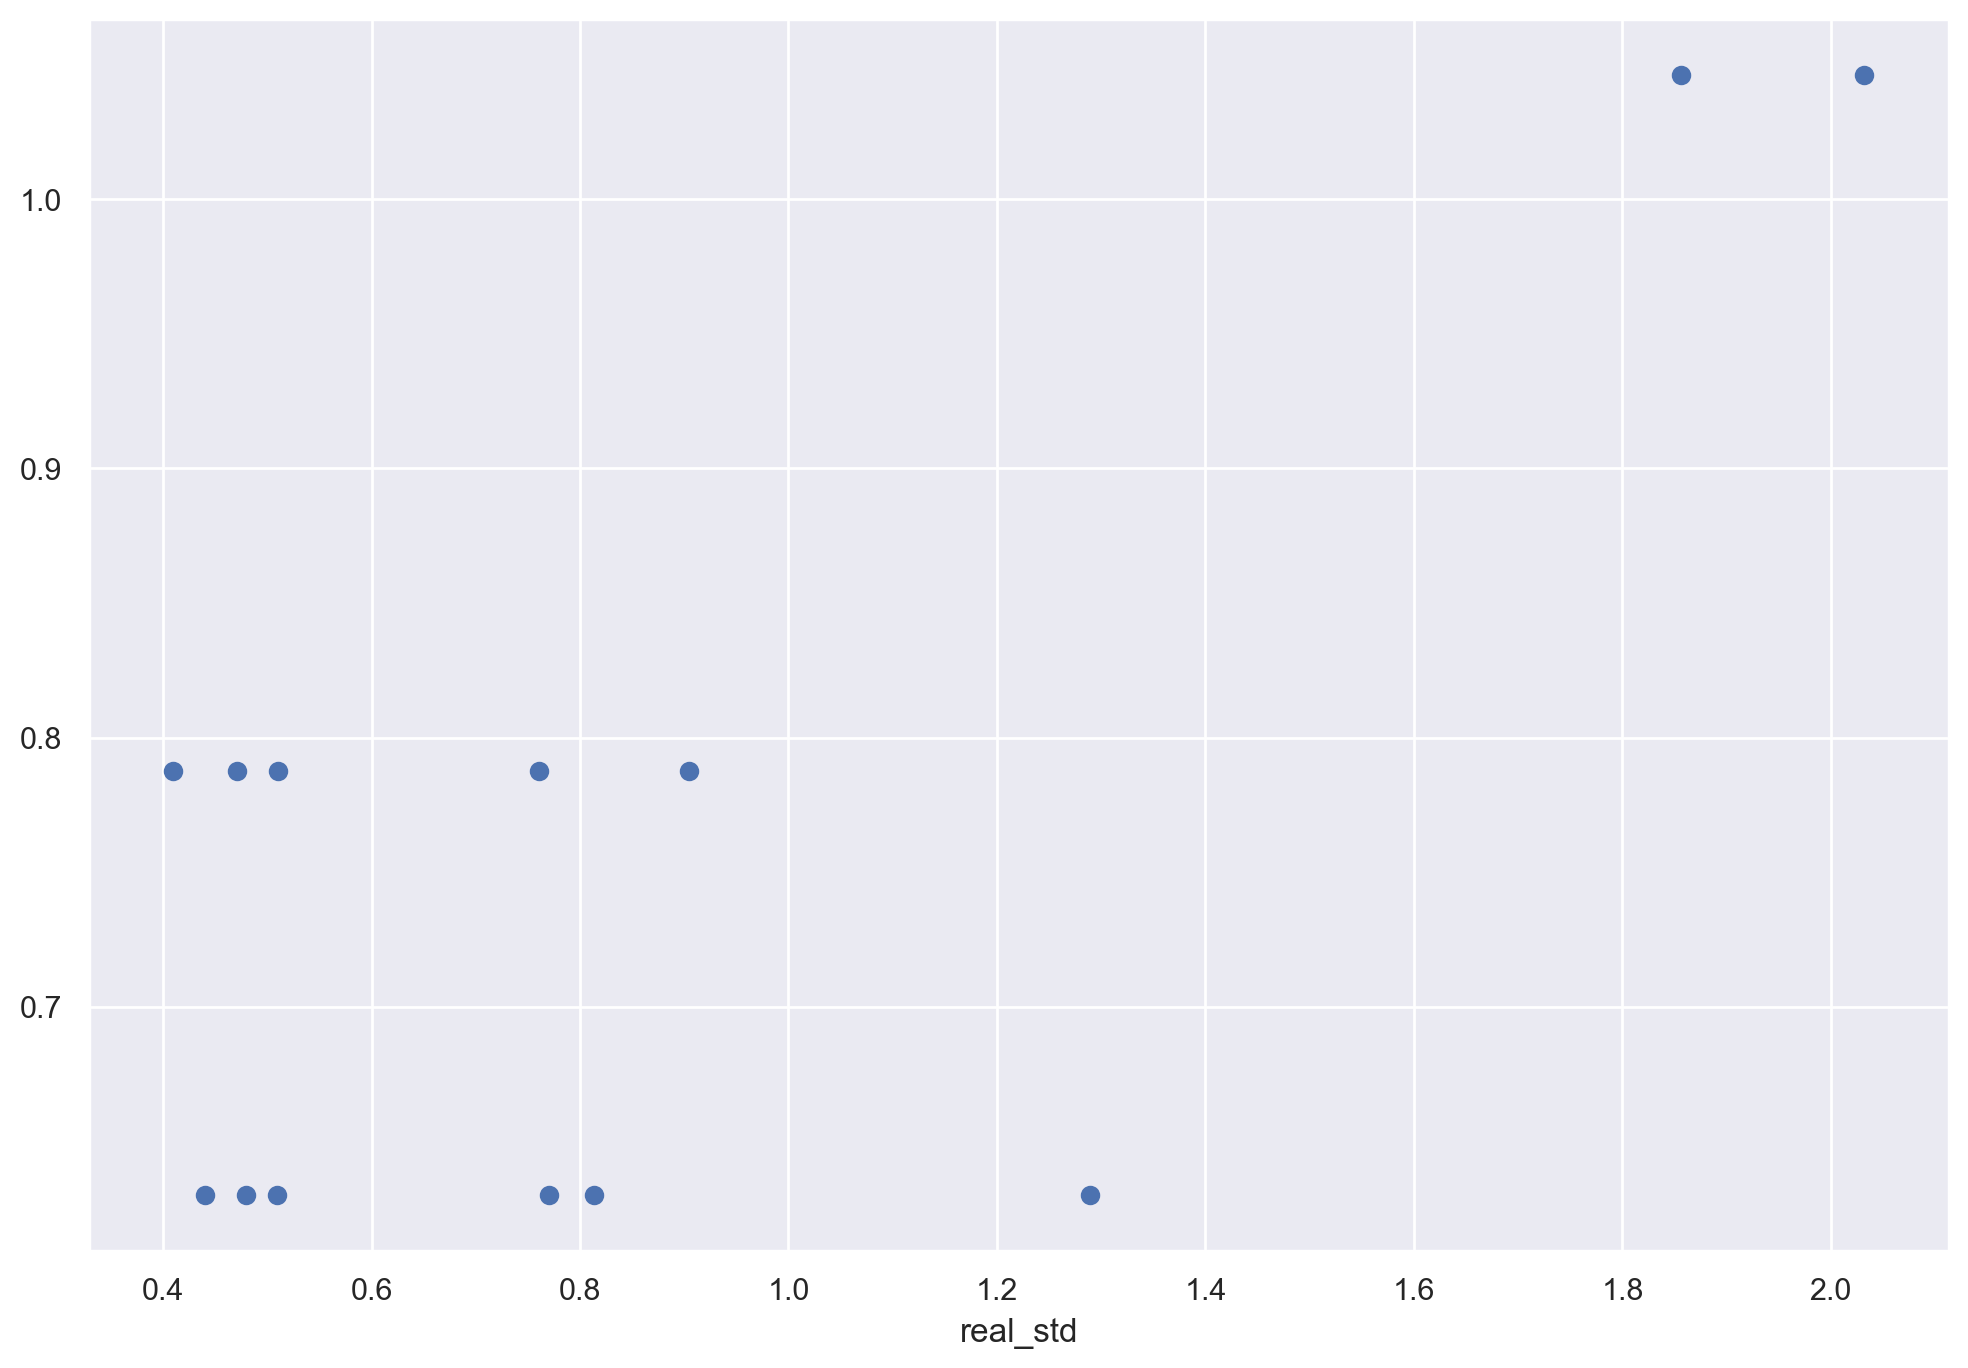

In [21]:
run_model(best_model,X_train, y_train, X_test, y_test)

In [22]:
### Default Decison Tree model

In [23]:
dt_regressor_default = DecisionTreeRegressor()

mae : 0.6257097468051638


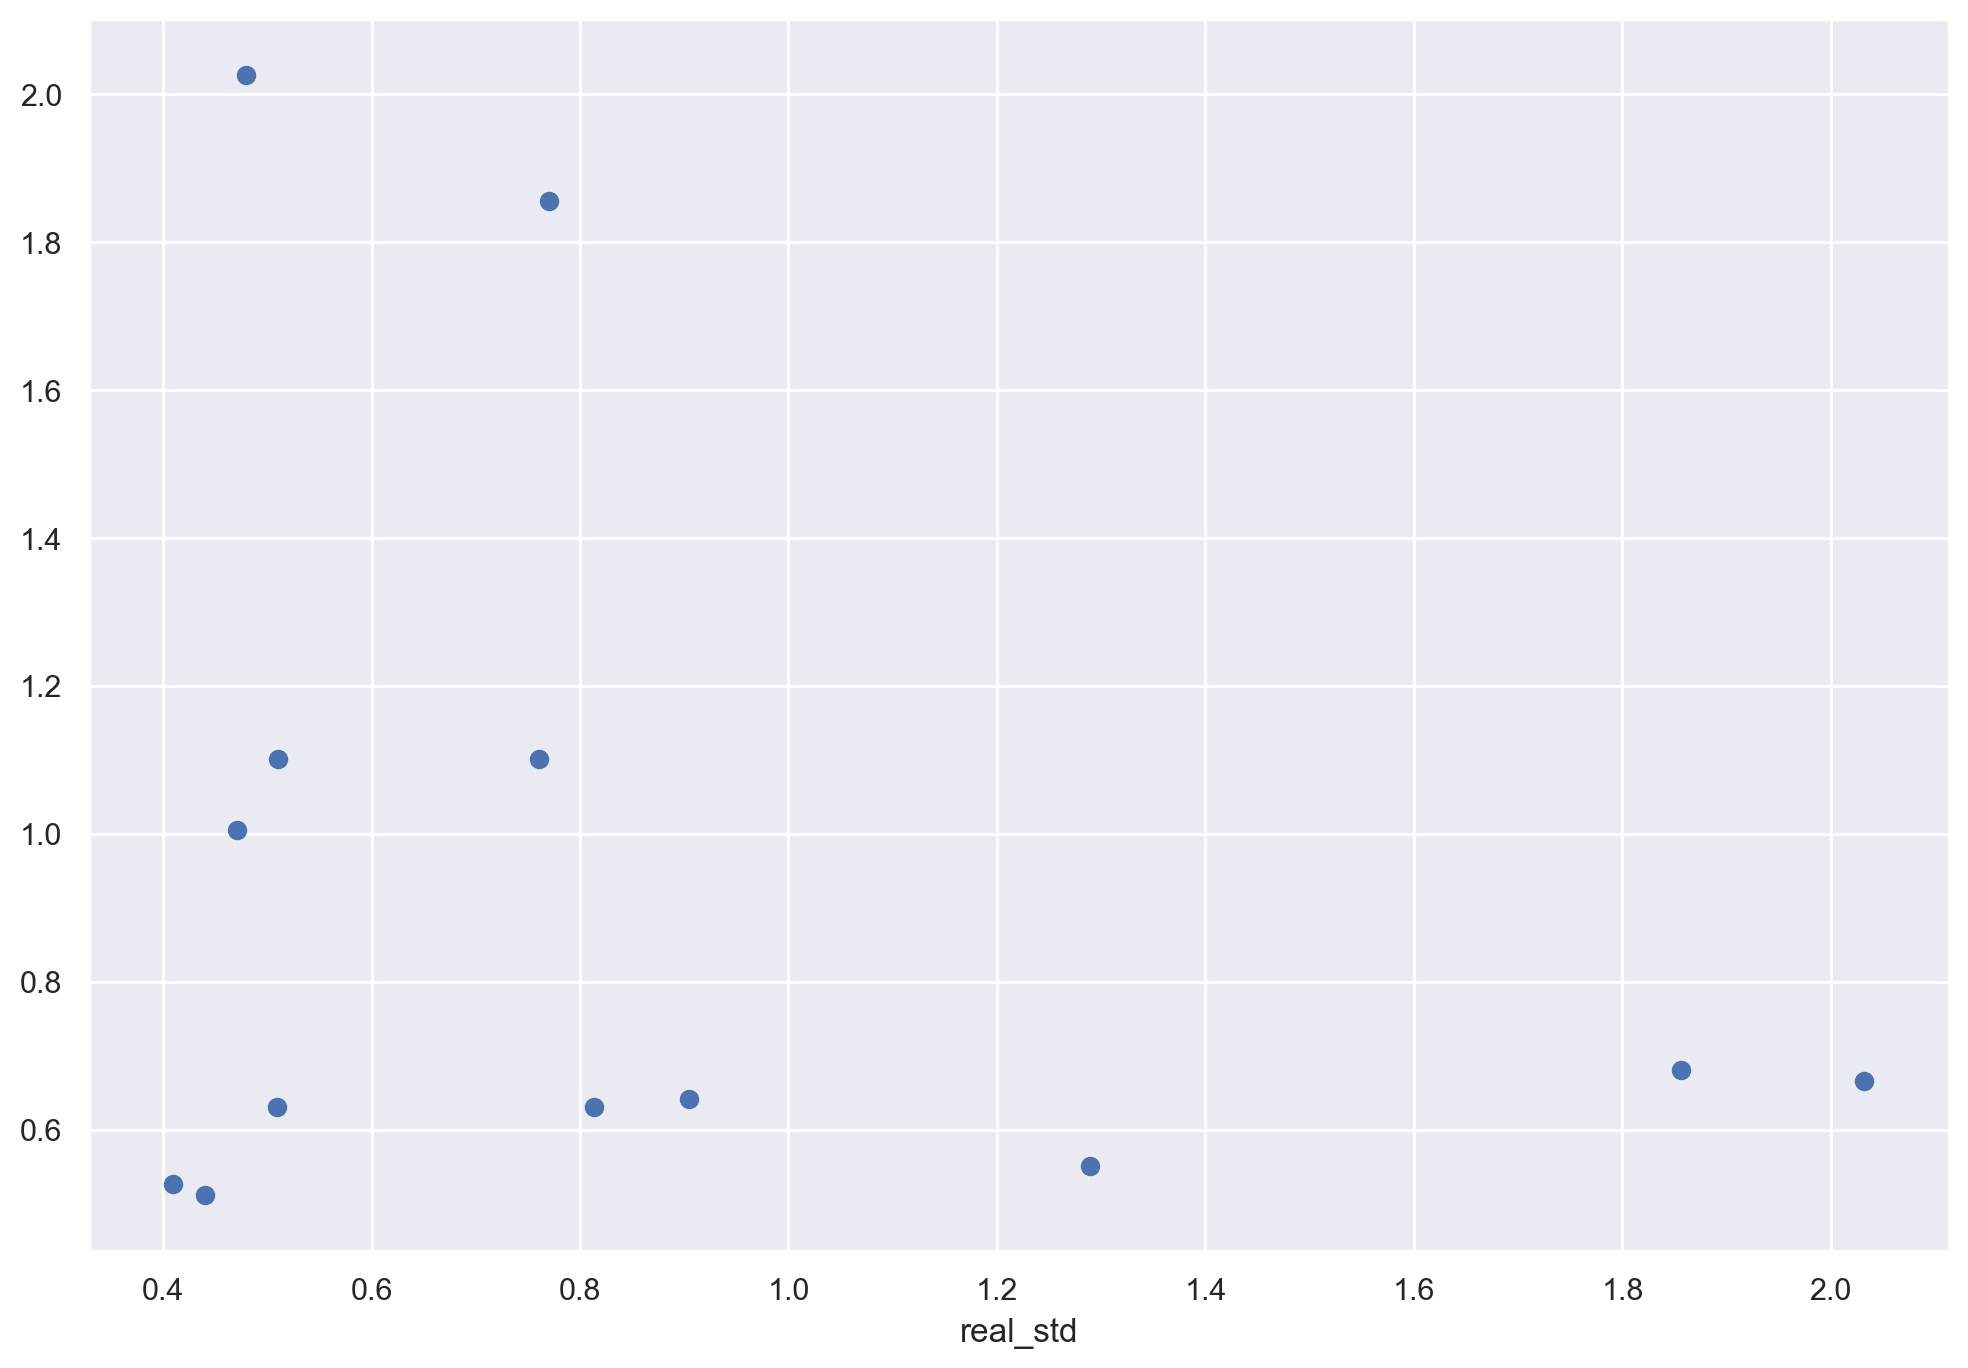

In [24]:
dt_model = run_model(dt_regressor_default,X_train, y_train, X_test, y_test)

In [25]:
## RF Grid Search

In [26]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best score: -0.3388053206072638
Mean Squared Error on test set: 0.2088091355459113


In [27]:
pd.DataFrame(index=X.columns,data=best_model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
prior_std,0.184757
prior_Vol,0.138366
cut_open,0.044451
cut_1hr,0.002190
cut_2hr,0.089285
cut_3hr,0.016642
vix_prior_std,0.033722
vix_cut_open,0.053249
vix_cut_1hr,0.022179
vix_cut_2hr,0.032121


In [28]:
import joblib
# Assuming 'model' is your trained model object
filename = 'rf_model.joblib'
joblib.dump(model, filename)

# To load the model later:
#loaded_model = joblib.load(filename)

NameError: name 'model' is not defined

In [ ]:
run_model(best_model,X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# Instantiate Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=10)

# Instantiate Grid Search
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_tree = grid_search.best_estimator_

# Evaluate the best model on the test set (optional)
test_score = best_tree.score(X_test, y_test)
print("Test score:", test_score)

In [ ]:
best_tree.feature_importances_

In [ ]:
pd.DataFrame(index=X.columns,data=best_tree.feature_importances_,columns=['Feature Importance'])

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))
plot_tree(best_tree);

In [ ]:
predic = best_tree.predict(X_test)

In [ ]:
plt.scatter(y_test, predic)

----

## KNN Regression

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test,preds)
    print(f'mae : {mae}')
   
    
    plt.figure(figsize=(12,8),dpi=200)
    plt.scatter(y_test, preds)
    plt.xlabel('real_std')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
preds = {}
k_values = [3,4,5,6]
for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
model.get_n_leaves()

----

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [ ]:
grid = GridSearchCV(svr,param_grid)

In [ ]:
run_model(grid,X_train,y_train,X_test,y_test)

In [ ]:
grid.best_estimator_

---

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# help(RandomForestRegressor)

In [ ]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# help(GradientBoostingRegressor)

In [ ]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [29]:
## XGBOOST

In [30]:
!pip install xgboost

In [31]:
import xgboost as xgb
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Initialize XGBoost regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgbr,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=10,
                           verbose=0,
                          n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", np.sqrt(-grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best score: 0.5872718025718054
Test RMSE: 0.42434392305156454


mae : 0.34395376593908505


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

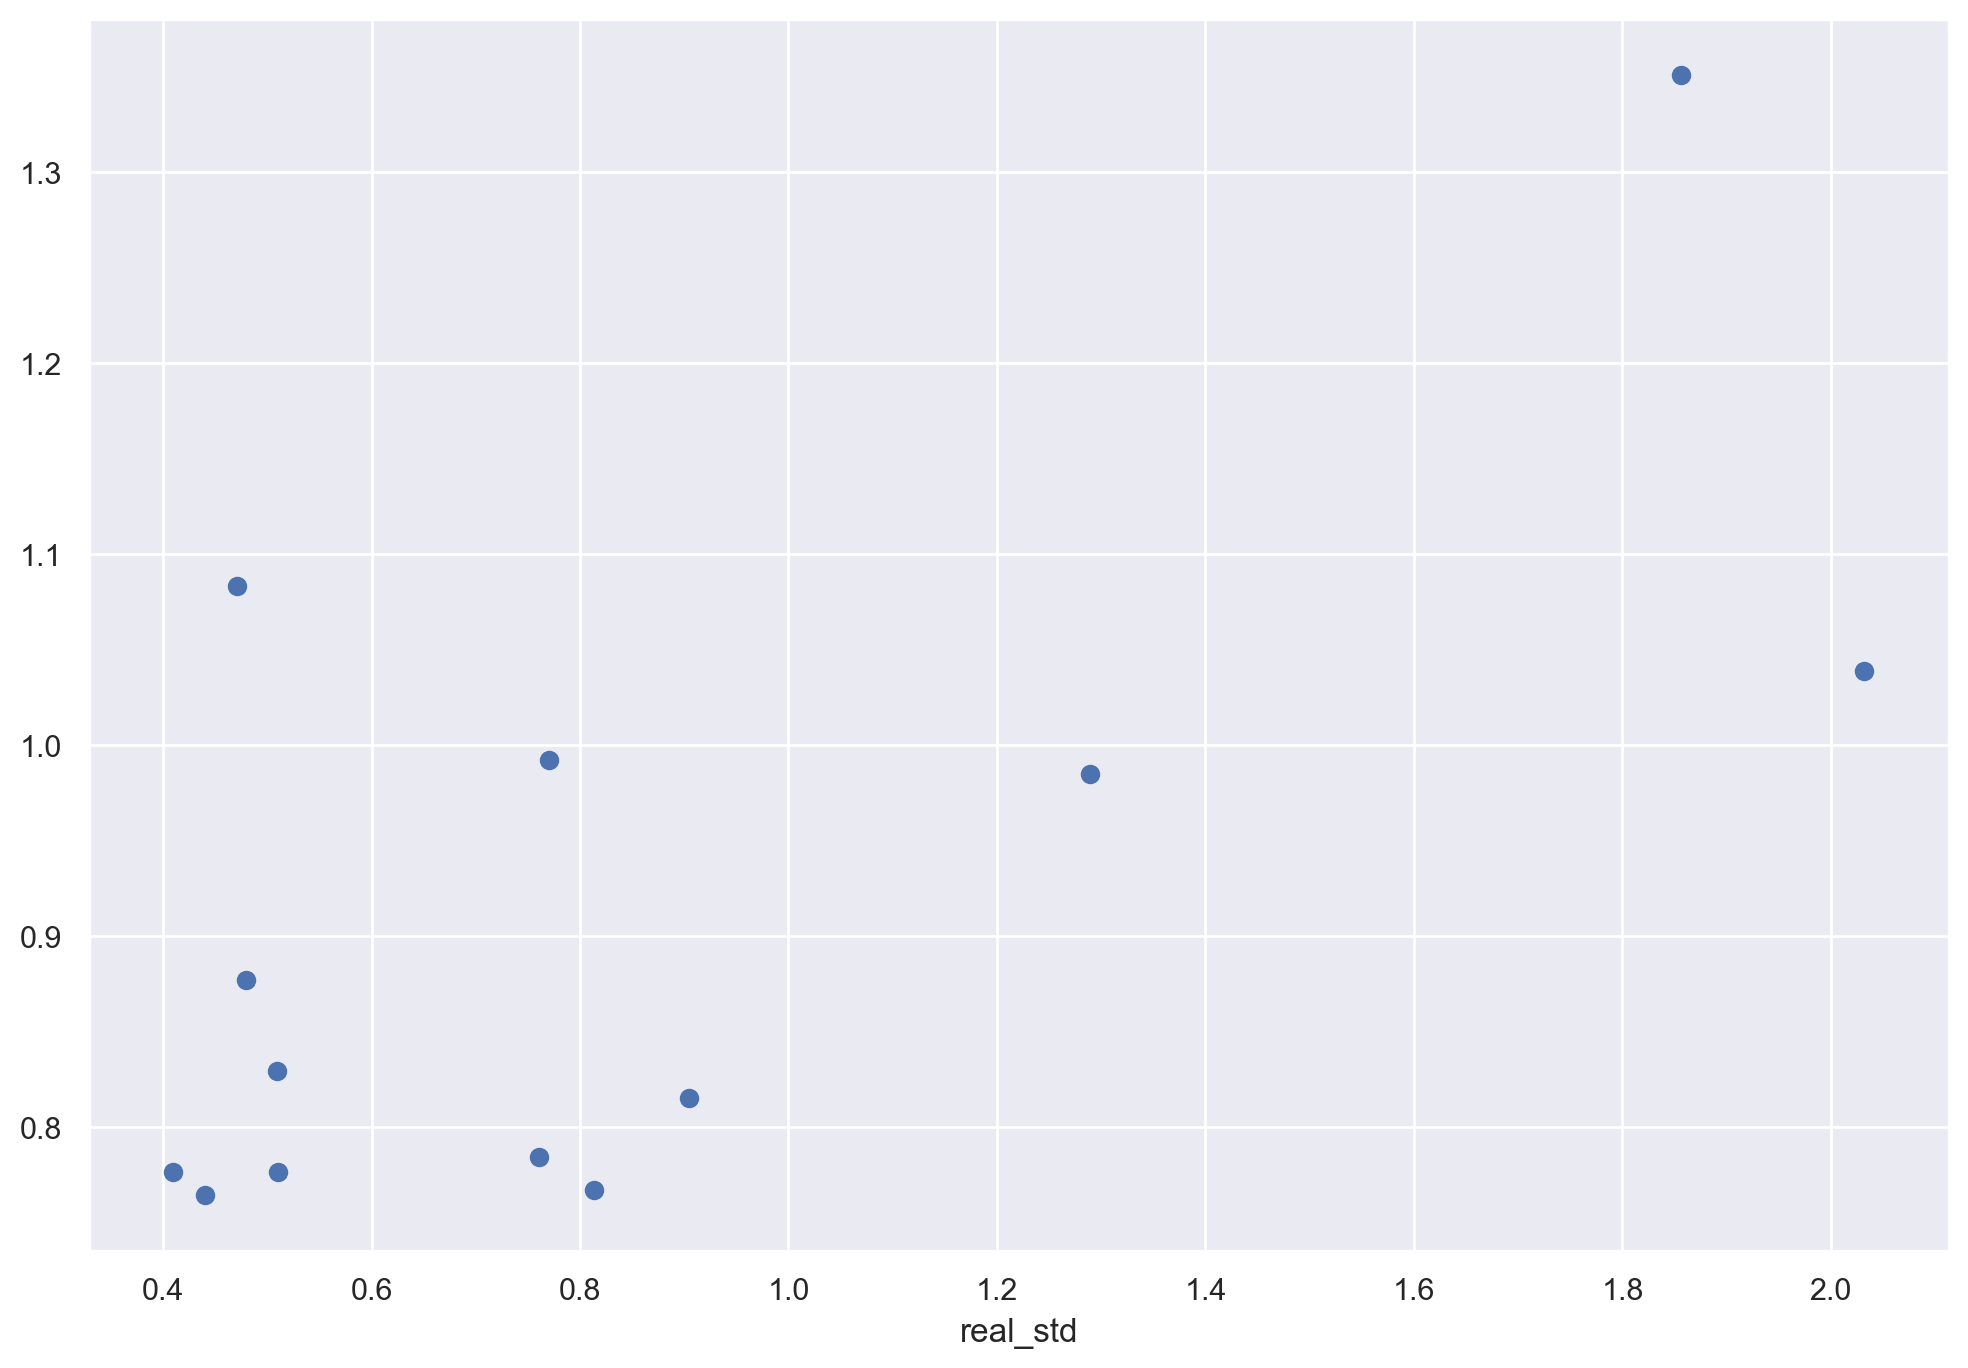

In [32]:
run_model(best_model,X_train,y_train,X_test,y_test)

In [33]:
import joblib
# Assuming 'model' is your trained model object
filename = 'xgb_model.joblib'
joblib.dump(best_model, filename)


['xgb_model.joblib']

----